# **USANDO PROPHET PARA PREDIÇÃO DE CASOS DE COVID NO BRASIL**

## **Dataset**
[https://brasil.io/dataset/covid19/caso](https://brasil.io/dataset/covid19/caso)

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/MarceloAugustoMathias/covid-19/master/ComparandoEstados_BR/covid-brasil.csv')

In [3]:
df

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-01,AC,Acrelândia,city,8,0.0,True,15256.0,1200013.0,52.43838,NaN
1,2020-04-01,AC,Porto Acre,city,1,0.0,True,18504.0,1200807.0,5.40424,NaN
2,2020-04-01,AC,Rio Branco,city,34,0.0,True,407319.0,1200401.0,8.34727,NaN
3,2020-04-01,AC,NaN,state,43,0.0,True,881935.0,12.0,4.87564,NaN
4,2020-04-01,AL,Importados/Indefinidos,city,4,0.0,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4069,2020-02-28,SP,NaN,state,2,NaN,False,45919049.0,35.0,0.00436,NaN
4070,2020-02-27,SP,São Paulo,city,1,NaN,False,12252023.0,3550308.0,0.00816,NaN
4071,2020-02-27,SP,NaN,state,1,NaN,False,45919049.0,35.0,0.00218,NaN
4072,2020-02-26,SP,São Paulo,city,1,NaN,False,12252023.0,3550308.0,0.00816,NaN


In [4]:
df.columns

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths', 'is_last',
       'estimated_population_2019', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')

In [0]:
df.columns = ['Data', 'Estado', 'Cidade', 'Tipo_Local', 'Confirmados', 'Mortes', 'E_Ultimo', 'Pop_Estimada_2019', 'Codigo_IBGE', 'Confirmados_por100k', 'Taxa_Mortalidade']

In [6]:
df.tail()

,Data,Estado,Cidade,Tipo_Local,Confirmados,Mortes,E_Ultimo,Pop_Estimada_2019,Codigo_IBGE,Confirmados_por100k,Taxa_Mortalidade
4069,2020-02-28,SP,NaN,state,2,NaN,False,45919049.0,35.0,0.00436,NaN
4070,2020-02-27,SP,São Paulo,city,1,NaN,False,12252023.0,3550308.0,0.00816,NaN
4071,2020-02-27,SP,NaN,state,1,NaN,False,45919049.0,35.0,0.00218,NaN
4072,2020-02-26,SP,São Paulo,city,1,NaN,False,12252023.0,3550308.0,0.00816,NaN
4073,2020-02-26,SP,NaN,state,1,NaN,False,45919049.0,35.0,0.00218,NaN


In [7]:
#loc[ linhas , colunas ]
estados = df.loc[df.Tipo_Local == 'state', : ]
estados.head()

,Data,Estado,Cidade,Tipo_Local,Confirmados,Mortes,E_Ultimo,Pop_Estimada_2019,Codigo_IBGE,Confirmados_por100k,Taxa_Mortalidade
3,2020-04-01,AC,NaN,state,43,0.0,True,881935.0,12.0,4.87564,NaN
7,2020-04-01,AL,NaN,state,18,1.0,True,3337357.0,27.0,0.53935,0.0556
17,2020-04-01,AM,NaN,state,200,3.0,True,4144597.0,13.0,4.82556,0.0150
19,2020-04-01,AP,NaN,state,11,0.0,True,845731.0,16.0,1.30065,NaN
54,2020-04-01,BA,NaN,state,246,2.0,True,14873064.0,29.0,1.65400,0.0081


In [8]:
estados.Estado.unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [9]:
len(estados.Estado.unique())

27

In [0]:
data = estados[['Data', 'Estado', 'Confirmados', 'Mortes', 'E_Ultimo']]

In [11]:
data.head()

,Data,Estado,Confirmados,Mortes,E_Ultimo
3,2020-04-01,AC,43,0.0,True
7,2020-04-01,AL,18,1.0,True
17,2020-04-01,AM,200,3.0,True
19,2020-04-01,AP,11,0.0,True
54,2020-04-01,BA,246,2.0,True


In [0]:
from fbprophet import Prophet

In [0]:
data = data.groupby('Data').sum()['Confirmados'].reset_index()

In [14]:
data.tail()

,Data,Confirmados
31,2020-03-28,3926
32,2020-03-29,4197
33,2020-03-30,4660
34,2020-03-31,5824
35,2020-04-01,6926


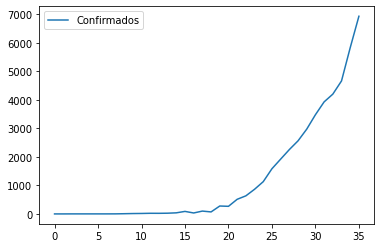

In [15]:
data.plot()

In [0]:
data.columns = ['ds', 'y']

In [17]:
data['ds'] = pd.to_datetime(data['ds'])
data.tail()

,ds,y
31,2020-03-28,3926
32,2020-03-29,4197
33,2020-03-30,4660
34,2020-03-31,5824
35,2020-04-01,6926


In [0]:
data['floor'] = 1   ##definindo capacidade minima do forecast
data['cap'] = 25000

In [19]:
data.tail()

,ds,y,floor,cap
31,2020-03-28,3926,1,25000
32,2020-03-29,4197,1,25000
33,2020-03-30,4660,1,25000
34,2020-03-31,5824,1,25000
35,2020-04-01,6926,1,25000


In [0]:
dias = 10

In [21]:
m = Prophet(growth='logistic', interval_width=0.95)  ## Instanciando o profeta
m.fit(data)    ## Passando o DataFrame
futuro = m.make_future_dataframe(periods=dias) ## Criando as datas futuras no dataframe 'data'
futuro['floor'] = 1
futuro['cap'] = (25000)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
futuro.tail(20)

,ds,floor,cap
26,2020-03-23,1,25000
27,2020-03-24,1,25000
28,2020-03-25,1,25000
29,2020-03-26,1,25000
30,2020-03-27,1,25000
31,2020-03-28,1,25000
32,2020-03-29,1,25000
33,2020-03-30,1,25000
34,2020-03-31,1,25000
35,2020-04-01,1,25000


In [23]:
previsao = m.predict(futuro) ## Gerando a previsao
previsao.tail((dias))

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
36,2020-04-02,7743.579173,25000,1,7425.289877,8119.798243,7743.579170,7743.579176,21.138624,21.138624,21.138624,21.138624,21.138624,21.138624,0.0,0.0,0.0,7764.717796
37,2020-04-03,8764.808506,25000,1,8418.982798,9120.099834,8764.808498,8764.808516,17.379929,17.379929,17.379929,17.379929,17.379929,17.379929,0.0,0.0,0.0,8782.188435
38,2020-04-04,9843.905295,25000,1,9489.728465,10216.946835,9843.905278,9843.905314,10.797172,10.797172,10.797172,10.797172,10.797172,10.797172,0.0,0.0,0.0,9854.702467
39,2020-04-05,10966.132730,25000,1,10583.618551,11281.061443,10966.132702,10966.132760,-37.910522,-37.910522,-37.910522,-37.910522,-37.910522,-37.910522,0.0,0.0,0.0,10928.222209
40,2020-04-06,12114.049893,25000,1,11697.058617,12426.856351,12114.049855,12114.049935,-53.359423,-53.359423,-53.359423,-53.359423,-53.359423,-53.359423,0.0,0.0,0.0,12060.690469
41,2020-04-07,13268.529266,25000,1,12924.266275,13620.633690,13268.529219,13268.529318,-1.157249,-1.157249,-1.157249,-1.157249,-1.157249,-1.157249,0.0,0.0,0.0,13267.372017
42,2020-04-08,14410.003425,25000,1,14130.200162,14778.983683,14410.003366,14410.003486,43.111470,43.111470,43.111470,43.111470,43.111470,43.111470,0.0,0.0,0.0,14453.114895
43,2020-04-09,15519.773177,25000,1,15195.600682,15873.111545,15519.773106,15519.773247,21.138624,21.138624,21.138624,21.138624,21.138624,21.138624,0.0,0.0,0.0,15540.911801
44,2020-04-10,16581.195073,25000,1,16254.420312,16941.702448,16581.194992,16581.195151,17.379929,17.379929,17.379929,17.379929,17.379929,17.379929,0.0,0.0,0.0,16598.575002
45,2020-04-11,17580.594212,25000,1,17242.820949,17930.014867,17580.594122,17580.594294,10.797172,10.797172,10.797172,10.797172,10.797172,10.797172,0.0,0.0,0.0,17591.391384


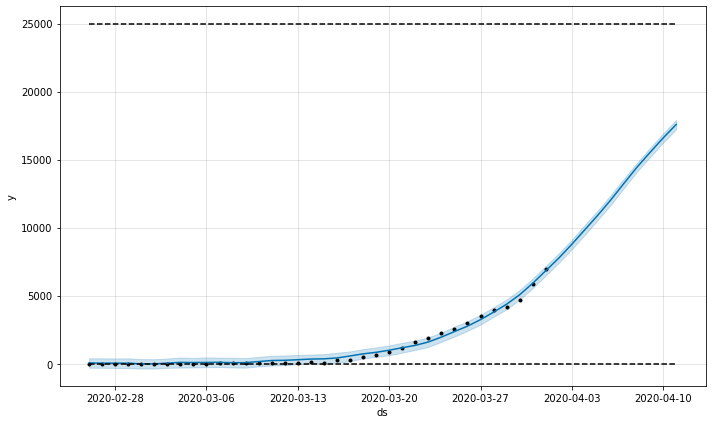

In [24]:
confirmed_forecast_plot = m.plot(previsao)

In [25]:
previsao[['ds', 'yhat_lower','yhat', 'yhat_upper']]

,ds,yhat_lower,yhat,yhat_upper
0,2020-02-26,-293.583445,58.525583,401.280019
1,2020-02-27,-299.701330,39.478164,396.980224
2,2020-02-28,-314.391834,39.238135,389.743005
3,2020-02-29,-325.055105,36.887359,396.376080
4,2020-03-01,-356.035906,-6.730752,341.958585
5,2020-03-02,-354.904889,-16.059143,333.108351
6,2020-03-03,-305.838856,43.502622,385.158876
7,2020-03-04,-285.035950,96.619892,457.820150
8,2020-03-05,-275.919553,85.284395,428.594871
9,2020-03-06,-253.525419,94.311444,461.868303
